In [1]:
import pandas as pd
%matplotlib inline

In [2]:
from sklearn import datasets
from pandas.tools.plotting import scatter_matrix

In [3]:
import matplotlib.pyplot as plt

In [4]:
iris = datasets.load_iris() # load iris data set

In [5]:
x = iris.data[:,2:] # the attributes
y = iris.target # the target variable

In [6]:
from sklearn import tree

In [7]:
dt = tree.DecisionTreeClassifier()

In [8]:
dt = dt.fit(x,y)

## Now what? 

In [9]:
from sklearn.cross_validation import train_test_split

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33,train_size=0.66)

In [11]:
dt = dt.fit(x_train,y_train)

In [12]:
from sklearn import metrics

In [13]:
import numpy as np

In [14]:
def measure_performance(X,y,clf, show_accuracy=True, show_classification_report=True, show_confussion_matrix=True):
    y_pred=clf.predict(X)
    if show_accuracy:
        print("Accuracy:{0:.3f}".format(metrics.accuracy_score(y, y_pred)),"\n")
    if show_classification_report:
        print("Classification report")
        print(metrics.classification_report(y,y_pred),"\n")
    if show_confussion_matrix:
        print("Confusion matrix")
        print(metrics.confusion_matrix(y,y_pred),"\n")

In [15]:
measure_performance(x_train,y_train,dt)

Accuracy:0.990 

Classification report
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        32
          1       0.97      1.00      0.99        39
          2       1.00      0.96      0.98        28

avg / total       0.99      0.99      0.99        99
 

Confusion matrix
[[32  0  0]
 [ 0 39  0]
 [ 0  1 27]] 



In [16]:
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(iris.target_names))
    plt.xticks(tick_marks, iris.target_names, rotation=45)
    plt.yticks(tick_marks, iris.target_names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [17]:
y_pred = dt.fit(x_train, y_train).predict(x_test) #generate a prediction based on the model created to output a predicted y

Confusion matrix, without normalization
[[18  0  0]
 [ 0 11  0]
 [ 0  2 19]]


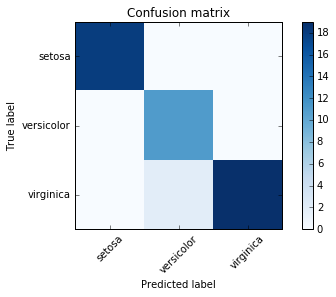

In [18]:
cm = metrics.confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.figure()
plot_confusion_matrix(cm)